In [1]:
%matplotlib inline
import math
import copy
import numpy as np
import pandas as pd
from matplotlib import pylab as plt

In [2]:
df = pd.DataFrame(
    {
        'weight_mass': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
        'spring_length': [5.3, 5.7, 6.4, 6.9, 7.7, 8.2, 8.4, 9.8, 9.9, 10.7]
    }
)

## 二条和誤差

$$
MSE = \sum_{i=1}{n} (y_i - f(x_i))^2
$$

In [3]:
def rss(data):
  """
  :param data
  """
  result = 0

  for i in data.iterrows():
    result += (i[1]['spring_length'] - i[1]['prediction']) ** 2
  
  return result

## 最小二乗法（回帰直線）

$$
f(x) = ax + b \\
a = \frac{Cov_{x,y}}{\sigma _x^2} \\
b = \bar{y} - a \bar{x}
$$

In [4]:
def cov(x, y):
  """
  :param: x: sample x
  :param: y: sample y
  :return: covariance
  """
  x_mean = np.mean(x)
  y_mean = np.mean(y)
  n = len(x)
  c = 0.0

  for i in range(n):
    x_i = x[i]
    y_i = y[i]
    c += (x_i - x_mean) * (y_i - y_mean)
  
  return c / n

def std(x):
  """
  :param x: sample
  :return: standard deviation
  """
  mu = np.mean(x)
  _std = 0.0
  n = len(x)

  for i in range(n):
    _std += (x[i] - mu) ** 2
  
  _std = _std / n

  return np.sqrt(_std)

def slope(x, y):
  a = cov(x, y) / (std(x) ** 2)
  return a

def intercept(x, y):
  mean_x = np.array(x).mean()
  mean_y = np.array(y).mean()
  a = slope(x, y)
  b = mean_y - mean_x * a
  return b

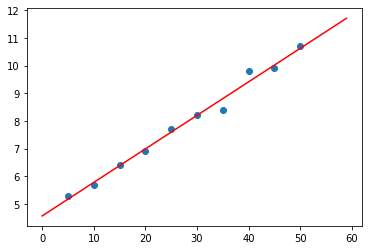

In [5]:
a = slope(df['weight_mass'], df['spring_length'])
b = intercept(df['weight_mass'], df['spring_length'])

x_data = np.arange(0, 60)
y_data = a * x_data + b

plt.scatter(df['weight_mass'], df['spring_length'])
plt.plot(x_data, y_data, 'r-')
plt.show()